In [7]:
import torch
from torch import nn


class Net(nn.Module):
    def __init__(self, n_chans,n_classes):
        super(Net, self).__init__()

        self.temp_conv1 = nn.Conv1d(n_chans, n_chans, kernel_size=2, stride=2 ,groups=n_chans)
        self.temp_conv2 = nn.Conv1d(n_chans, n_chans, kernel_size=2, stride=2 ,groups=n_chans)
        self.temp_conv3 = nn.Conv1d(n_chans, n_chans, kernel_size=2, stride=2 ,groups=n_chans)
        self.temp_conv4 = nn.Conv1d(n_chans, n_chans, kernel_size=2, stride=2 ,groups=n_chans)
        self.temp_conv5 = nn.Conv1d(n_chans, n_chans, kernel_size=2, stride=2 ,groups=n_chans)
        self.temp_conv6 = nn.Conv1d(n_chans, n_chans, kernel_size=2, stride=2 ,groups=n_chans)

        self.chpool1    = nn.Sequential(
            nn.Conv1d(n_chans, 32, kernel_size=4,groups=1),
            nn.BatchNorm1d(32),
            nn.LeakyReLU(0.01),
            nn.Conv1d(32, 32, kernel_size=4,groups=1),
            nn.BatchNorm1d(32),
            nn.LeakyReLU(0.01))

        self.chpool2    = nn.Sequential(
            nn.Conv1d(n_chans, 32, kernel_size=4,groups=1),
            nn.BatchNorm1d(32),
            nn.LeakyReLU(0.01),
            nn.Conv1d(32, 32, kernel_size=4,groups=1),
            nn.BatchNorm1d(32),
            nn.LeakyReLU(0.01))

        self.chpool3    = nn.Sequential(
            nn.Conv1d(n_chans, 32, kernel_size=4,groups=1),
            nn.BatchNorm1d(32),
            nn.LeakyReLU(0.01),
            nn.Conv1d(32, 32, kernel_size=4,groups=1),
            nn.BatchNorm1d(32),
            nn.LeakyReLU(0.01))
            
        self.chpool4    = nn.Sequential(
            nn.Conv1d(n_chans, 32, kernel_size=4,groups=1),
            nn.BatchNorm1d(32),
            nn.LeakyReLU(0.01),
            nn.Conv1d(32, 32, kernel_size=4,groups=1),
            nn.BatchNorm1d(32),
            nn.LeakyReLU(0.01))

        self.chpool5    = nn.Sequential(
            nn.Conv1d(n_chans, 32, kernel_size=4,groups=1),
            nn.BatchNorm1d(32),
            nn.LeakyReLU(0.01),
            nn.Conv1d(32, 32, kernel_size=4,groups=1),
            nn.BatchNorm1d(32),
            nn.LeakyReLU(0.01))

        self.classifier = nn.Sequential(
            nn.Linear(160,64),
            nn.LeakyReLU(0.01),
            nn.Linear(64,32),
            nn.Sigmoid(),
            nn.Linear(32,n_classes))

    def forward(self, x , training=True):

        temp_x  = self.temp_conv1(x)               
        temp_w1 = self.temp_conv2(temp_x)         
        temp_w2 = self.temp_conv3(temp_w1)      
        temp_w3 = self.temp_conv4(temp_w2)       
        temp_w4 = self.temp_conv5(temp_w3)      
        temp_w5 = self.temp_conv6(temp_w4)      

        w1      = self.chpool1(temp_w1).mean(dim=(-1))
        w2      = self.chpool2(temp_w2).mean(dim=(-1))
        w3      = self.chpool3(temp_w3).mean(dim=(-1))
        w4      = self.chpool4(temp_w4).mean(dim=(-1))
        w5      = self.chpool5(temp_w5).mean(dim=(-1))
    
        concat_vector  = torch.cat([w1,w2,w3,w4,w5],1)
        classes        = nn.functional.log_softmax(self.classifier(concat_vector),dim=1)  

        return classes


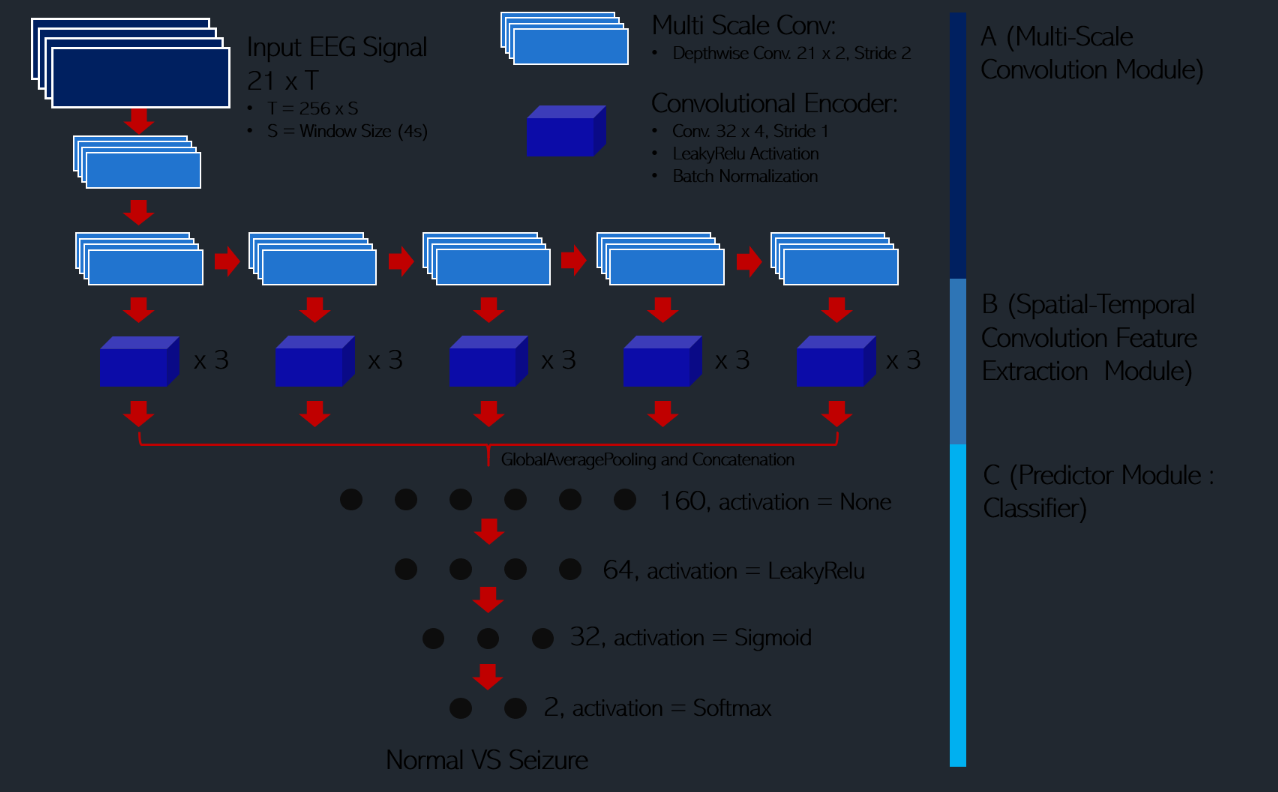

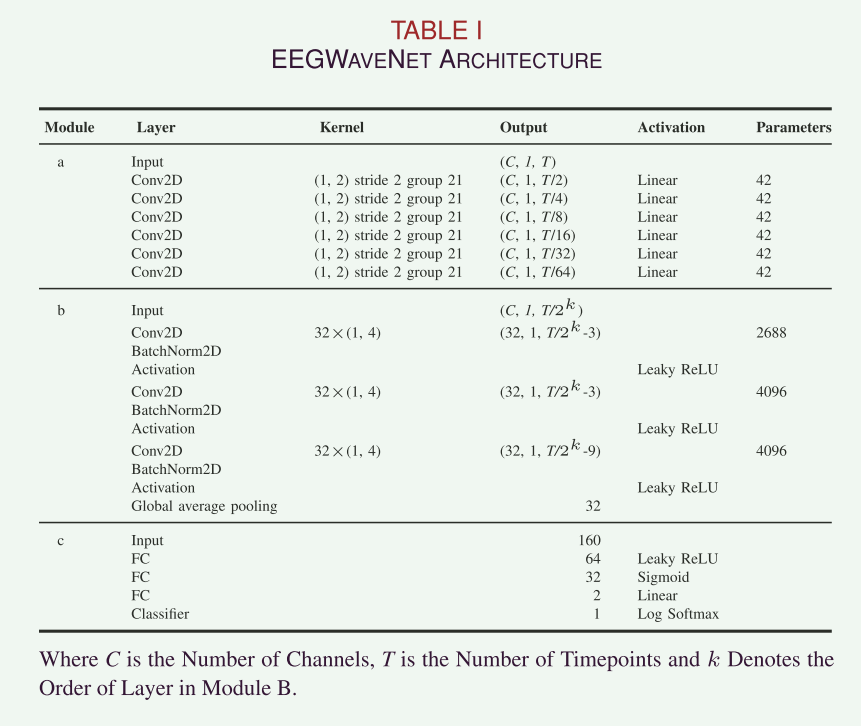